In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from scipy import sparse
from numpy import count_nonzero
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando a base de treino
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
treino = pd.read_csv('/content/train.csv', na_values = missing_value_formats)

In [3]:
# Observando
treino.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Observando numero de linhas e colunas
treino.shape

(4209, 378)

In [5]:
# Carregando a base de teste
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
teste = pd.read_csv('/content/test.csv', na_values = missing_value_formats)

In [6]:
# Observando
teste.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# Observando numero de linhas e colunas
teste.shape

(4209, 377)

In [8]:
# Dropando a coluna ID e salvando em uma variável separada idvar
treino = treino.drop(["ID"], axis=1)
idvar = teste['ID']
teste = teste.drop(["ID"], axis=1)

In [9]:
# Algumas informações sobre as variáveis
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [10]:
# Informações estatísticas
treino.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Observando a existência de valores nulos
treino.isnull().sum().sum()

0

In [12]:
# Observando a existência de valores nulos
teste.isnull().sum().sum()

0

In [13]:
from collections import Counter
def check_outliers(treino, n, y):
    indices = []  # Lista para armazenar os índices de outliers encontrados

    for i in y:  # Itera sobre cada feature especificada na lista 'features'

        # Determinando os quartis Q1 e Q3
        Quart1 = treino[i].quantile(0.25)
        Quart3 = treino[i].quantile(0.75)

        # Calculando os limites superiores e inferiores para outliers
        sup_outlier = Quart3 + (Quart3 - Quart1) * 1.5
        inf_outlier = Quart1 - (Quart3 - Quart1) * 1.5

        # Encontrando os outliers e salvando seus índices
        feature_outliers_list = treino[
            (treino[i] > sup_outlier) | (treino[i] < inf_outlier)
        ].index

        # Adicionando os índices dos outliers à lista principal 'indices'
        indices.extend(feature_outliers_list)

    # Selecionando índices que aparecem mais de 'n' vezes
    return list(a for a, b in Counter(indices).items() if b > n)

In [14]:
# Observando outliers na variável target 'y'
target_outliers = check_outliers(treino, 0, "y")
treino.loc[target_outliers]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
43,139.20,w,s,as,c,d,j,i,q,0,...,1,0,0,0,0,0,0,0,0,0
203,136.41,w,s,as,c,d,i,i,w,0,...,1,0,0,0,0,0,0,0,0,0
216,146.83,x,i,as,c,d,i,g,l,0,...,0,0,1,0,0,0,0,0,0,0
253,150.43,t,b,as,c,d,i,l,x,0,...,0,0,1,0,0,0,0,1,0,0
342,169.91,aa,l,ak,f,d,i,c,d,0,...,0,0,0,0,0,0,0,0,0,0
420,136.47,x,b,h,c,d,d,j,q,0,...,0,0,1,0,0,0,0,0,0,0
429,154.87,ak,l,ae,f,d,d,g,w,0,...,0,0,0,0,0,0,0,0,0,0
681,147.72,x,i,ae,c,d,c,g,y,0,...,0,0,1,0,0,0,0,0,0,0
846,140.49,x,aa,i,c,d,af,l,c,0,...,1,0,0,0,0,0,0,0,0,0
883,265.32,y,r,ai,f,d,ag,l,t,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Apagando os outliers, pois são apenas 1% dos valores
treino = treino.drop(target_outliers, axis = 0).reset_index(drop = True)

In [16]:
# Carregando variáveis categóricas
variaveis_categoricas = []
for i in treino.columns[0:378].tolist():
        if treino.dtypes[i] == 'object' or treino.dtypes[i] == 'category':
            variaveis_categoricas.append(i)

In [17]:
# Observando as variáveis categóricas
variaveis_categoricas

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [18]:
# Observando a distribuição das variáveis categóricas
def var_categoricas(treino, feature):
    plt.figure(figsize=(10,6))
    # Visualization
    palette = sns.color_palette("husl", len(treino["X0"].unique().tolist()))
    sns.stripplot(x=feature, y='y', data=treino, palette=palette)
    plt.title(f'Distribution of Target against {feature}')
    plt.show()

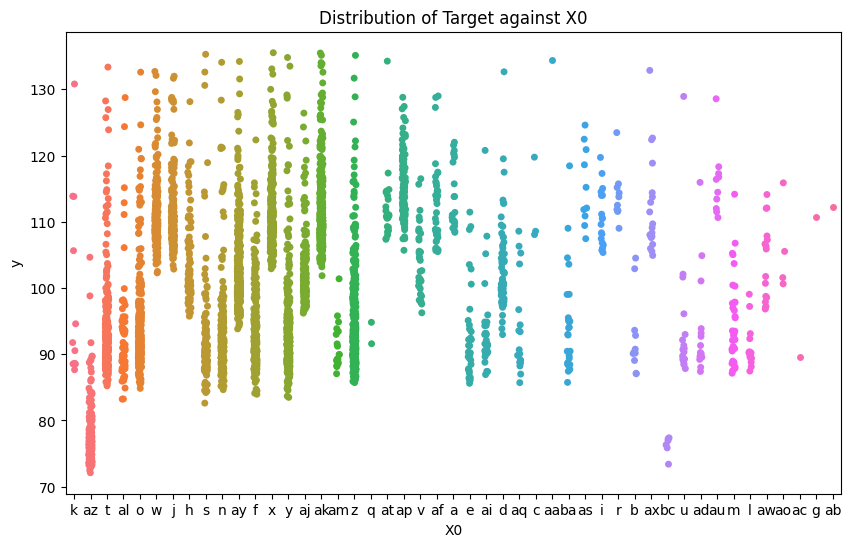

In [19]:
var_categoricas(treino, "X0")

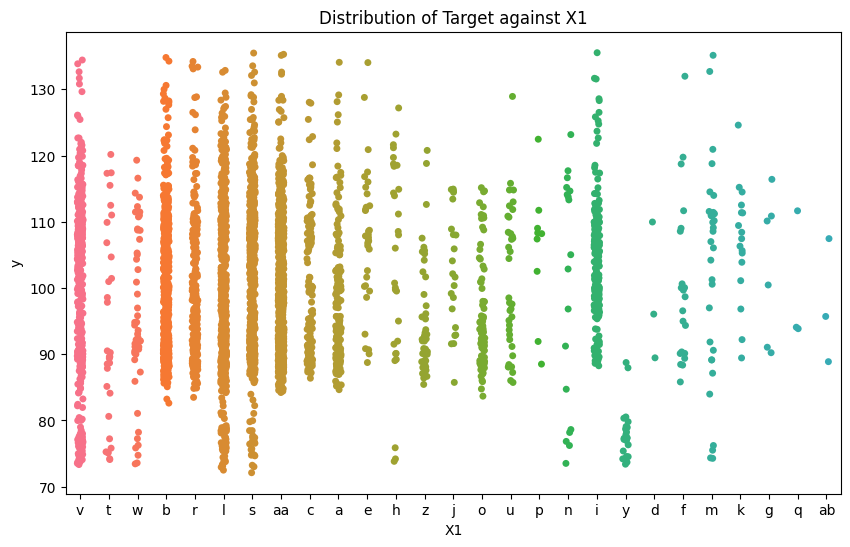

In [20]:
var_categoricas(treino, "X1")

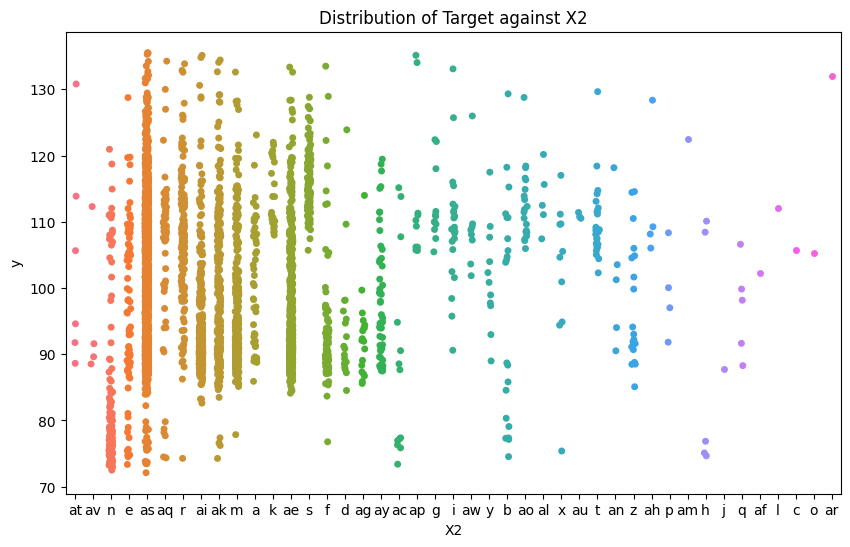

In [21]:
var_categoricas(treino, "X2")

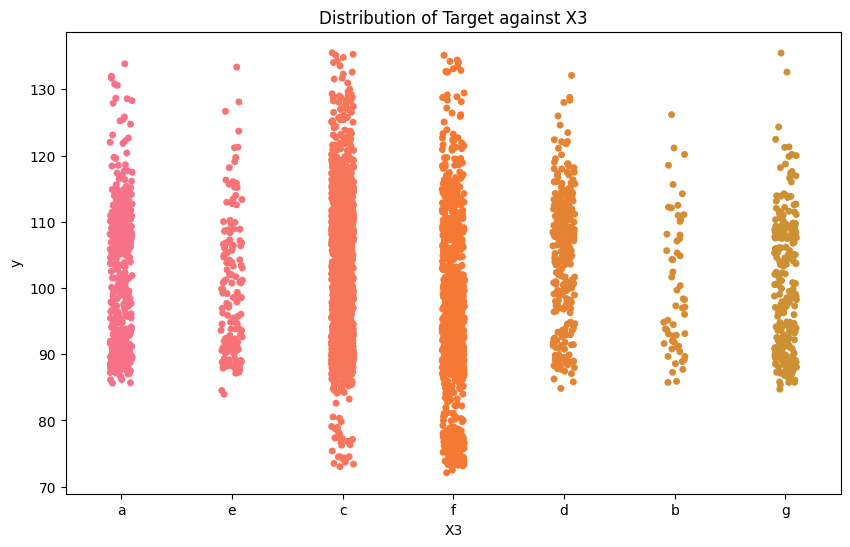

In [22]:
var_categoricas(treino, "X3")

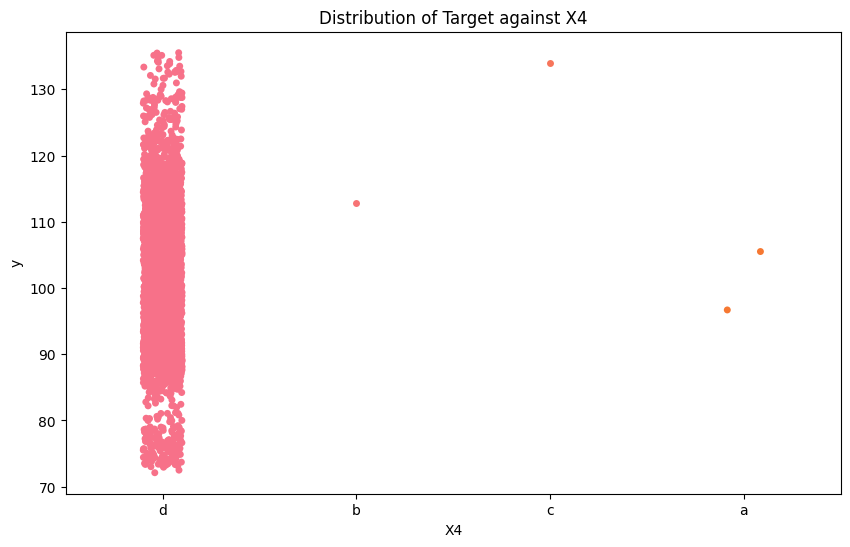

In [23]:
# Observamos que a variável X4 está concentrada apenas na categoria 'd'
var_categoricas(treino, "X4")

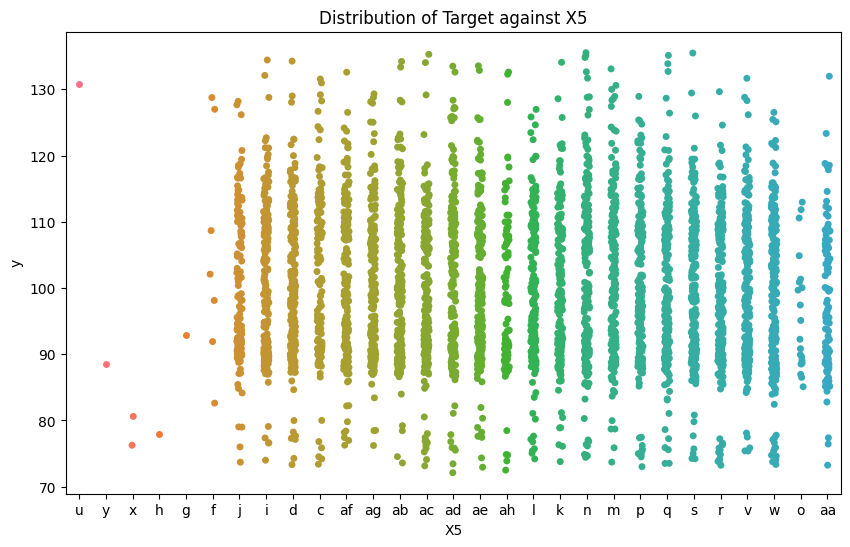

In [24]:
var_categoricas(treino, "X5")

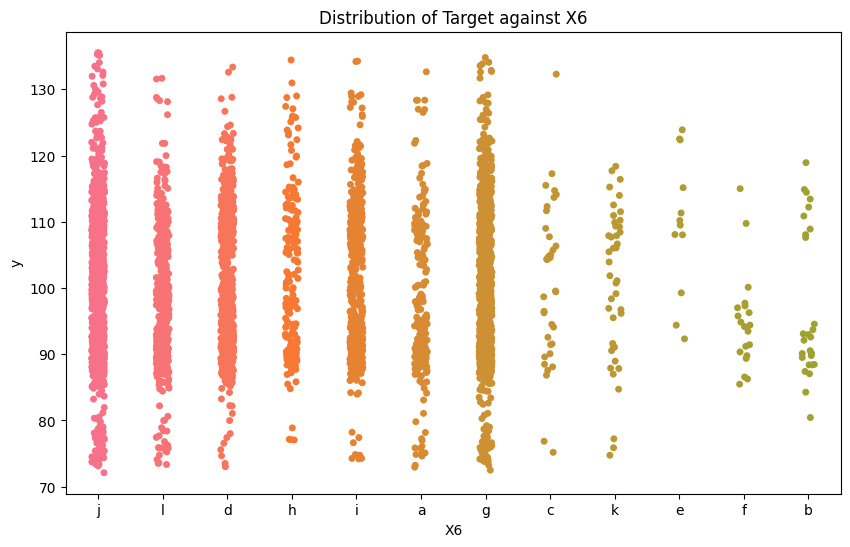

In [25]:
var_categoricas(treino, "X6")

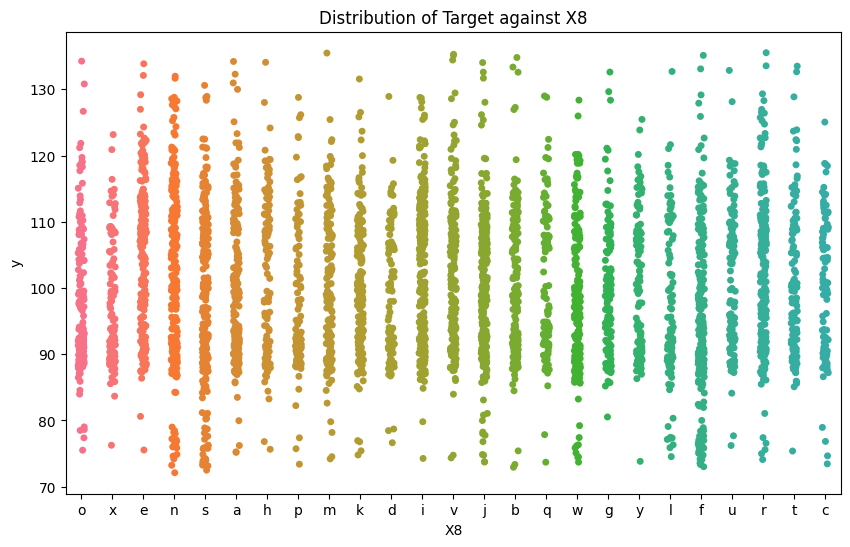

In [26]:
var_categoricas(treino, "X8")

In [27]:
# Removendo a variável X4
treino = treino.drop("X4", axis=1)
teste = teste.drop("X4", axis=1)

In [28]:
# Calculando a porcentagem de 0 e 1 em cada variável numérica
df_list = list() # Lista vaziaa para os resultados finais de %
treino1 = treino.select_dtypes(exclude="object") # Variável com apenas as colunas numéricas

for col in treino1.columns:
    zeros = (treino1[col]==0).sum() # Conta o número de 0 na coluna atual
    ones = (treino1[col]==1).sum() # Conta o número de 1 na coluna atual
    percent_ones = ones*100/(ones+zeros) # Calcula a porcentagem de 1 na coluna atual
    percent_zeros = 100 - percent_ones # Calcula a porcentagem de 0 na coluna atual
    df_list.append([col, percent_ones, percent_zeros]) # Adiciona uma lista com os valores de 0 e 1
    print(f"Feature: {col}, % Ones: {round(percent_ones, 1)}, % Zeros: {round(percent_zeros, 1)}")

df = pd.DataFrame(df_list, columns=['Feature', 'Percent Ones (%)', 'Percent Zeros (%)'])

Feature: y, % Ones: nan, % Zeros: nan
Feature: X10, % Ones: 1.3, % Zeros: 98.7
Feature: X11, % Ones: 0.0, % Zeros: 100.0
Feature: X12, % Ones: 7.5, % Zeros: 92.5
Feature: X13, % Ones: 5.8, % Zeros: 94.2
Feature: X14, % Ones: 42.8, % Zeros: 57.2
Feature: X15, % Ones: 0.0, % Zeros: 100.0
Feature: X16, % Ones: 0.3, % Zeros: 99.7
Feature: X17, % Ones: 0.8, % Zeros: 99.2
Feature: X18, % Ones: 0.8, % Zeros: 99.2
Feature: X19, % Ones: 10.1, % Zeros: 89.9
Feature: X20, % Ones: 14.3, % Zeros: 85.7
Feature: X21, % Ones: 0.3, % Zeros: 99.7
Feature: X22, % Ones: 8.7, % Zeros: 91.3
Feature: X23, % Ones: 2.1, % Zeros: 97.9
Feature: X24, % Ones: 0.2, % Zeros: 99.8
Feature: X26, % Ones: 0.5, % Zeros: 99.5
Feature: X27, % Ones: 68.3, % Zeros: 31.7
Feature: X28, % Ones: 3.3, % Zeros: 96.7
Feature: X29, % Ones: 4.4, % Zeros: 95.6
Feature: X30, % Ones: 0.5, % Zeros: 99.5
Feature: X31, % Ones: 23.3, % Zeros: 76.7
Feature: X32, % Ones: 1.1, % Zeros: 98.9
Feature: X33, % Ones: 0.0, % Zeros: 100.0
Feature: X3

In [29]:
# Observando os valores calculados
df.head()

,Feature,Percent Ones (%),Percent Zeros (%)
0,y,NaN,NaN
1,X10,1.346478,98.653522
2,X11,0.000000,100.000000
3,X12,7.453715,92.546285
4,X13,5.794662,94.205338


In [30]:
# Carregando as colunas onde os valores 0 e 1 representam 99%
var_excl = df[(df['Percent Ones (%)'] > 99) | (df['Percent Zeros (%)'] > 99)] # Filtra as colunas com valores > 99%

# Nomes da variáveis que satisfazem a condição
nomes = var_excl['Feature'].tolist()

print("Variáveis com porcentagem de 0 e 1 > 99%:", nomes)
print(f"Número total de variáveis: {len(nomes)}")

Variáveis com porcentagem de 0 e 1 > 99%: ['X11', 'X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34', 'X36', 'X39', 'X40', 'X42', 'X53', 'X55', 'X59', 'X60', 'X62', 'X65', 'X67', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X97', 'X99', 'X102', 'X104', 'X105', 'X107', 'X110', 'X112', 'X122', 'X123', 'X124', 'X125', 'X145', 'X153', 'X160', 'X165', 'X167', 'X169', 'X172', 'X173', 'X183', 'X184', 'X190', 'X192', 'X196', 'X199', 'X200', 'X204', 'X205', 'X207', 'X210', 'X212', 'X213', 'X214', 'X216', 'X217', 'X221', 'X227', 'X230', 'X233', 'X235', 'X236', 'X237', 'X239', 'X240', 'X242', 'X243', 'X245', 'X248', 'X249', 'X252', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262', 'X266', 'X267', 'X268', 'X269', 'X270', 'X271', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X289', 'X290', 'X292', 'X293', 'X295', 'X296', 'X297', 'X298', 'X299', 'X307', 'X308', 'X309', 'X310', 'X312', 'X317', 'X318', 'X319', 'X320', 'X323', 'X

In [31]:
# Dropando as variáveis com valores de 0 e 1 > 99%
treino = treino.drop(nomes, axis=1)
teste = teste.drop(nomes, axis=1)

In [32]:
# Observando shape
treino.shape

(4159, 229)

In [33]:
teste.shape

(4209, 228)

In [34]:
# Carregando variáveis categóricas novamete
variaveis_categoricas1 = []
for i in treino.columns[0:230].tolist():
        if treino.dtypes[i] == 'object' or treino.dtypes[i] == 'category':
            variaveis_categoricas1.append(i)

In [35]:
variaveis_categoricas1

['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']

In [36]:
# Observando os valores unicos da variável treino
treino_unic = treino.nunique()
treino_unic

y       2496
X0        47
X1        27
X2        43
X3         7
        ... 
X374       2
X375       2
X376       2
X377       2
X378       2
Length: 229, dtype: int64

In [37]:
# Observando os valores unicos da variável teste
teste_unic = teste.nunique()
teste_unic

X0      49
X1      27
X2      45
X3       7
X5      32
        ..
X374     2
X375     2
X376     2
X377     2
X378     2
Length: 228, dtype: int64

In [38]:
# Concatenando o dataset
mercedes = pd.concat([treino, teste], axis=0)

In [39]:
# Aplicando One-hot-encoding
mercedes = pd.get_dummies(mercedes, columns = variaveis_categoricas1, dtype = int)

In [40]:
# Dividindo novamente o dataset em treino e teste
treino_enc = mercedes.iloc[:len(treino)]
teste_enc = mercedes.iloc[len(treino):]

In [41]:
treino_enc.head()

,y,X10,X12,X13,X14,X19,X20,X22,X23,X27,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130.81,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
teste_enc.head()

,y,X10,X12,X13,X14,X19,X20,X22,X23,X27,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,NaN,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,NaN,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,NaN,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Separando os dados da variável treino_enc em x_treino e y_treino
x_treino = treino_enc.drop("y", axis=1)
y_treino = treino_enc["y"]

In [44]:
x_treino

,X10,X12,X13,X14,X19,X20,X22,X23,X27,X28,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4156,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4157,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
y_treino

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4154    107.39
4155    108.77
4156    109.22
4157     87.48
4158    110.85
Name: y, Length: 4159, dtype: float64

In [46]:
# Instalando as bibliotecas para os modelos de machine learning
!pip install catboost
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.1 MB/s eta 0:00:00


In [47]:
# Inicializando os modelos de regressão
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SVR': SVR(),
    'XGBR': XGBRegressor(positive=True),
    'Random Forest Regression': RandomForestRegressor(),
    'CatBoost Regression': CatBoostRegressor(silent=True)
}

In [48]:
# Iniciando validação cruzada
k_folds = KFold(n_splits=5, shuffle=True)

In [50]:
for name, model in models.items():
    print(f"Model: {name}")

    # Calcula o Score
    r2_scores = cross_val_score(model, x_treino, y_treino, cv=k_folds, scoring='r2')

    # Printa a pontuação
    print("R^2 scores:", r2_scores)

    # Calcula e imprime a media
    avg_r2 = np.mean(r2_scores)
    print("Average R^2:", avg_r2)
    print()

Model: Ridge Regression
R^2 scores: [0.6490221  0.66078312 0.56053826 0.62658069 0.63018622]
Average R^2: 0.6254220770216994

Model: Lasso Regression
R^2 scores: [0.43763462 0.42711427 0.43568    0.44953971 0.42868525]
Average R^2: 0.4357307708910575

Model: SVR
R^2 scores: [0.638194   0.59449375 0.55635579 0.57216165 0.58022523]
Average R^2: 0.5882860848451622

Model: XGBR
R^2 scores: [0.60585494 0.58198139 0.57614893 0.59176993 0.5666437 ]
Average R^2: 0.5844797781211243

Model: Random Forest Regression
R^2 scores: [0.61512723 0.61088265 0.53829794 0.63678731 0.6314263 ]
Average R^2: 0.6065042841669348

Model: CatBoost Regression
R^2 scores: [0.63235511 0.60973119 0.6335999  0.60718856 0.65136785]
Average R^2: 0.6268485238402801



In [51]:
# Selecionando o modelo que se saiu melhor
model = Ridge()


In [52]:
# Definindo os parâmetros
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [53]:
# Ajustando os hiperparâmetros de forma sistemática
best_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [54]:
# Iniciando o treinamento
best_model.fit(x_treino, y_treino)
print("Melhores parâmetros encontrados: ", best_model.best_params_)
print("Melhor score encontrado: ", best_model.best_score_)

Melhores parâmetros encontrados:  {'alpha': 10.0, 'solver': 'lsqr'}
Melhor score encontrado:  0.624327981873864


In [55]:
# Separando a variável target para a previsão
x_teste = teste_enc.drop(labels="y", axis=1)

In [56]:
# Variável para fazer as previsões do modelo ajustado
y_pred = best_model.predict(x_teste)

In [57]:
# Transformando as previsões em uma série do pandas e combinando os dataframes idvar e test_predictions
teste_predictions = pd.Series(y_pred, name="y")
mercedes_results = pd.concat([idvar, teste_predictions], axis = 1)
mercedes_results.to_csv('submission.csv', index=False)

In [58]:
# Observando o resultado final
mercedes_results

,ID,y
0,1,80.969525
1,2,93.726972
2,3,82.242592
3,4,80.156031
4,5,109.824840
...,...,...
4204,8410,102.391849
4205,8411,90.392727
4206,8413,92.070389
4207,8414,109.439940
